# Numerical Exercises 05

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


## Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

## Solution

### Metropolis algorithm

Metropolis algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution for which direct sampling is difficult. If we want to sample from a target probability distribution $p(x)$, Metropolis algorithm works as follows:

1. Choose an initial point $x_0$ from the space of $x$.

2. From a trial transition probability $T(x_{i+1}|x_i)$, generate a new point $x_{i+1}$ with a fixed lenght of the step $\delta$.

3. Accept the new point with a probability given by the Metropolis acceptance criterion: $$ A(x_i,x_{i+1}) = \min\left[1,\frac{p(x_{i+1})T(x_i|x_{i+1})}{p(x_i)T(x_{i+1}|x_i)}\right]$$

4. If the new point is accepted, set $x_{i+1} = x_{i+1}$, otherwise set $x_{i+1} = x_i$.

In this case i used as transition probability a uniform and a multivariate normal distribution. In addition, the transition probability turns out to be symmetrical and is simplified (along with the normalization constants) into the acceptance probability.

### Code 

I defined a `metropolis` function (see `lib.cpp` code) that takes as input the target probability distribution, the transition probability, the number of steps and the initial point. The function returns a list of sampled points.

```c++
vector<vector<double>> metropolis(double (*f)(vector<double>), Random& rnd, vector<double> x0, double step, int n, bool Gaussian = false){

/* ... */

    for (int i = 1; i < n; i++) {
            vector<double> x_new(3);
            for (int j = 0; j < 3; j++) {
                x_new[j] = x[i-1][j] + step * (rnd.Rannyu(-1, 1)); // or rnd.Gauss() if T(x|y) is Gaussian
            }
            double p_accept = f(x_new) / f(x[i-1]); // assuming T(x_n|x_n-1) is symmetric
            if (rnd.Rannyu() < p_accept) {
                x[i] = x_new;
                accepted++;
            } else {
                x[i] = x[i-1];
            }
        }
/* ... */

    return x;
}
```

I defined the target probability densities to be sampled and implemented the Metropolis algorithm using both types of proposal distributions (uniform and Gaussian). In the `main` function, I computed the observables required by the assignment using the data blocking technique to estimate the statistical uncertainties.

Additionally, the code includes (commented out) sections that allow exporting the sampled points to files for subsequent visualization in Python.






In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from numba import njit
import warnings

warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'

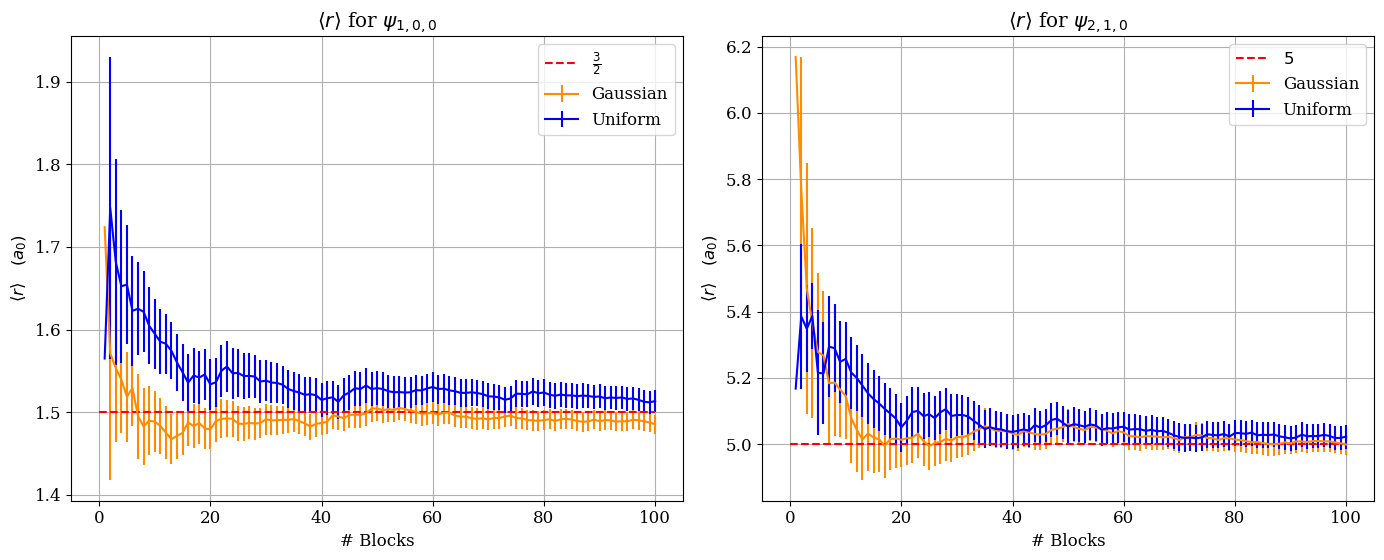

In [19]:
data_1s = pd.read_csv('data/r_1s.dat', sep=' ')
data_2p = pd.read_csv('data/r_2p.dat', sep=' ')
data_1s_gauss = pd.read_csv('data/r_1s_Gauss.dat', sep=' ')
data_2p_gauss = pd.read_csv('data/r_2p_Gauss.dat', sep=' ')

n_blocks = 100

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].errorbar(data_1s_gauss['#Block'], data_1s_gauss['r_avg'], yerr=data_1s_gauss['r_err'], label='Gaussian', color='darkorange')
axs[0].errorbar(data_1s['#Block'], data_1s['r_avg'], yerr=data_1s['r_err'], label='Uniform', color='blue')
axs[0].set_xlabel('# Blocks')
axs[0].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[0].hlines(y=3./2., xmin=0, xmax=n_blocks, color='r', linestyle='--', label=r'$\frac{3}{2}$')
axs[0].grid()
axs[0].legend()
axs[0].set_title(r'$\langle r \rangle$ for $\psi_{1,0,0}$')


axs[1].errorbar(data_2p_gauss['#Block'], data_2p_gauss['r_avg'], yerr=data_2p_gauss['r_err'], label='Gaussian', color='darkorange')
axs[1].errorbar(data_2p['#Block'], data_2p['r_avg'], yerr=data_2p['r_err'], label='Uniform', color='blue')
axs[1].set_xlabel('# Blocks')
axs[1].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[1].hlines(y=5, xmin=0, xmax=n_blocks, color='r', linestyle='--', label=r'$5$')
axs[1].grid()
axs[1].legend()
axs[1].set_title(r'$\langle r \rangle$ for $\psi_{2,1,0}$')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

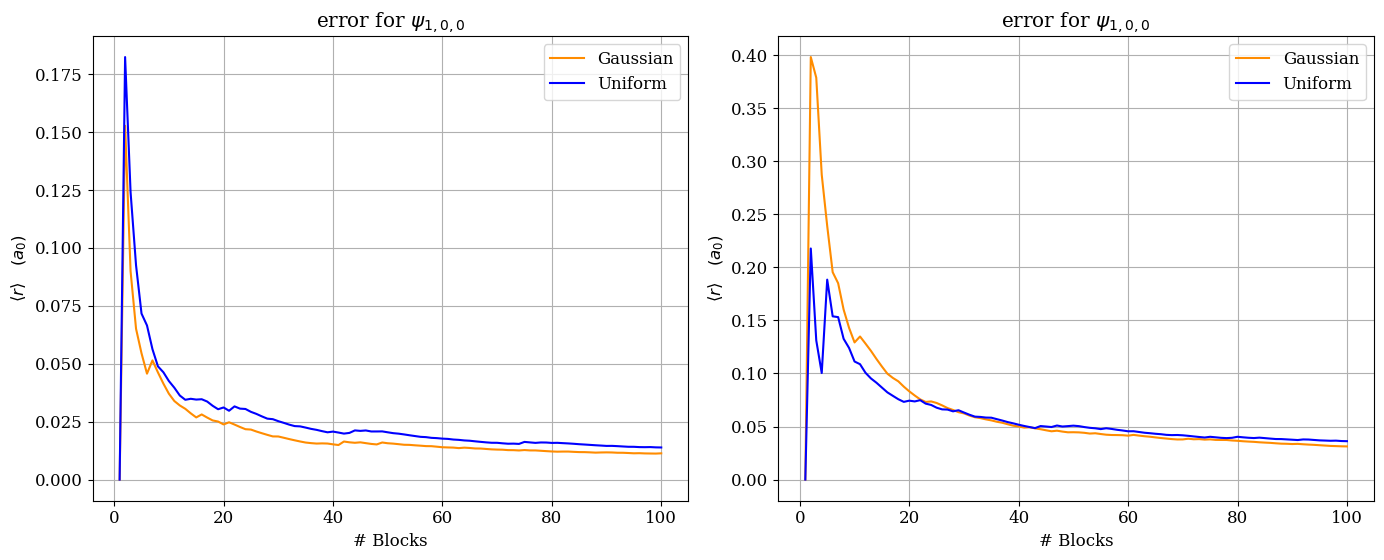

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(data_1s_gauss['#Block'], data_1s_gauss['r_err'], label='Gaussian', color='darkorange')
axs[0].plot(data_1s['#Block'], data_1s['r_err'], label='Uniform', color='blue')
axs[0].set_xlabel('# Blocks')
axs[0].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[0].grid()
axs[0].legend()
axs[0].set_title(r'error for $\psi_{1,0,0}$')


axs[1].plot(data_2p_gauss['#Block'], data_2p_gauss['r_err'], label='Gaussian', color='darkorange')
axs[1].plot(data_2p['#Block'], data_2p['r_err'], label='Uniform', color='blue')
axs[1].set_xlabel('# Blocks')
axs[1].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[1].grid()
axs[1].legend()
axs[1].set_title(r'error for $\psi_{1,0,0}$')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

From the plots above, we can see that with both the uniform and Gaussian transition probabilites, the estimated values of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are consistent with the expected values and show no particular differences.

I emphasize that the initial point $x_{0}$ was chosen reasonably in the origin of the axes $(0,0,0)$, so the sampling converged quickly.

To get an idea I briefly show the points sampled by Metropolis

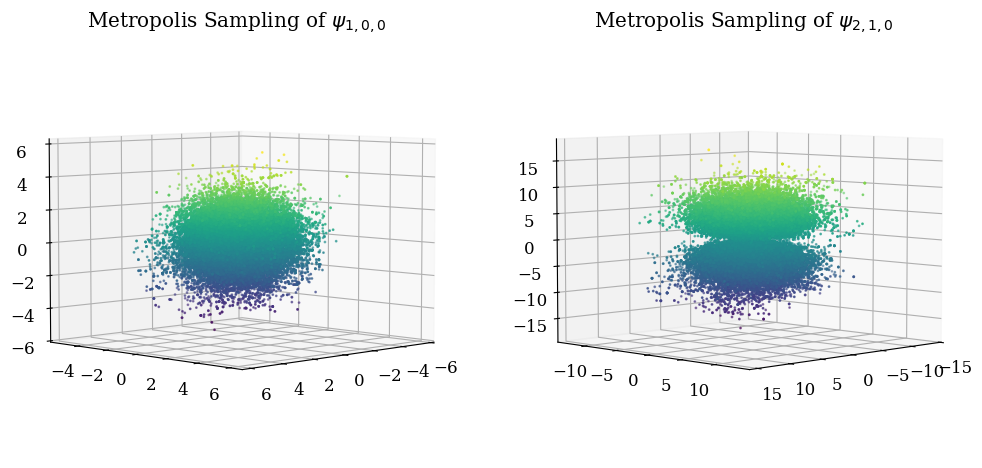

In [13]:
df_1s = pd.read_csv('data/1s_Gauss.dat', sep=' ')
df_2p = pd.read_csv('data/2p_Gauss.dat', sep=' ')

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df_1s['#x'], df_1s['y'], df_1s['z'], s=1, c = df_1s['z'])
ax1.set_title(r'Metropolis Sampling of $\psi_{1,0,0}$')
ax1.view_init(elev=5, azim=45)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df_2p['x'], df_2p['y'], df_2p['z'], s=1, c = df_2p['z'])
ax2.set_title(r'Metropolis Sampling of $\psi_{2,1,0}$')
ax2.view_init(elev=5, azim=45)

plt.show()

### The 50% empirical "rule"

The Metropolis algorithm converges to the target distribution after a certain equilibration time. Beyond this point, the samples  $x_i$ tend to lie in regions of high probability density.

Choosing the step size $\delta$  is crucial for the efficiency of the algorithm:

- If $\delta$ is too large, most proposed moves fall in low-probability regions and are therefore rejected, resulting in low acceptance and inefficient sampling.
- If $\delta$ is too small, most proposed moves are accepted, but the resulting samples are highly correlated and explore the space slowly.

In this exercise, i used the following step sizes to match the 50% acceptance rate:

| State | Uniform Step Size | Gaussian Step Size |
|-------|-------------------|--------------------|
| 1s    | 1.20              | 0.75               |
| 2p    | 2.95              | 1.90               |



### Sampling starting from $x_0 = (100, 100, 100)$

I tried to sample the wave functions starting very far from the origin, at $(100, 100, 100)$.

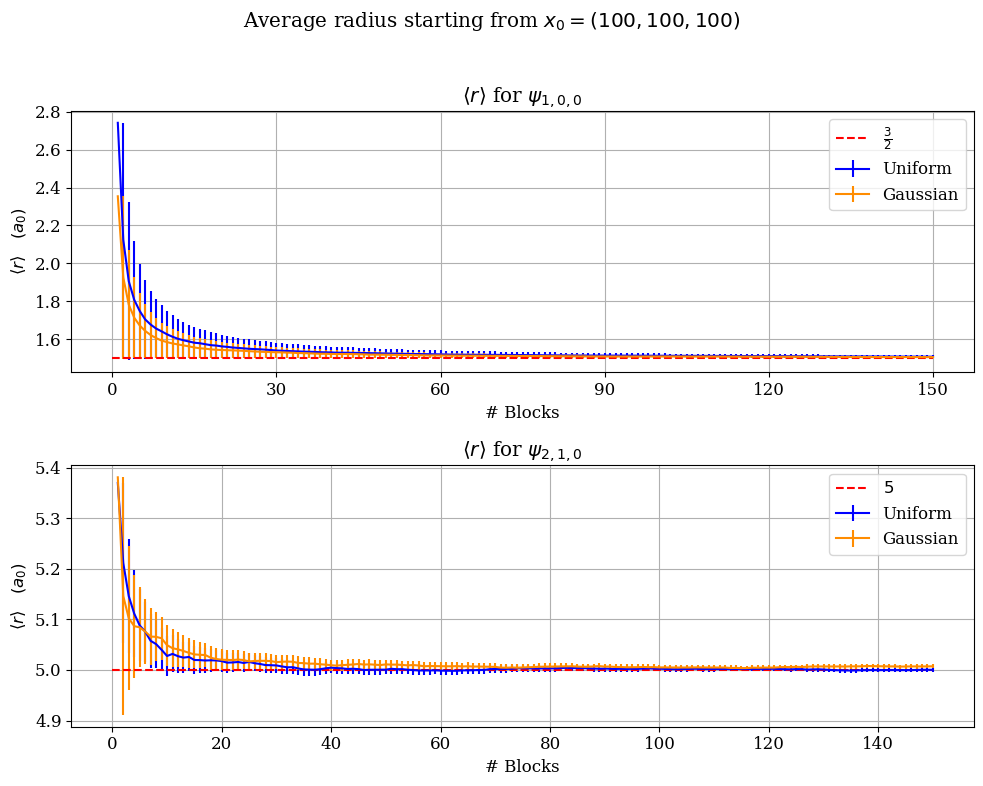

In [14]:
r_1s_far = pd.read_csv('data/r_1s_far.dat', sep=' ')
r_2p_far = pd.read_csv('data/r_2p_far.dat', sep=' ')
r_1s_gauss_far = pd.read_csv('data/r_1s_Gauss_far.dat', sep=' ')
r_2p_gauss_far = pd.read_csv('data/r_2p_Gauss_far.dat', sep=' ')

n_blocks = 150

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plt.suptitle(r'Average radius starting from $x_0 = (100,100,100)$')

axs[0].errorbar(r_1s_far['#Block'], r_1s_far['r_avg'], yerr=r_1s_far['r_err'], label='Uniform', color='blue')
axs[0].errorbar(r_1s_gauss_far['#Block'], r_1s_gauss_far['r_avg'], yerr=r_1s_gauss_far['r_err'], label='Gaussian', color='darkorange')
axs[0].set_xlabel('# Blocks')
axs[0].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[0].hlines(y=3./2., xmin=0, xmax=n_blocks, color='r', linestyle='--', label=r'$\frac{3}{2}$')
axs[0].grid()
axs[0].set_xticks(np.arange(0, n_blocks + 1, 30))
axs[0].legend()
axs[0].set_title(r'$\langle r \rangle$ for $\psi_{1,0,0}$')

axs[1].errorbar(r_2p_far['#Block'], r_2p_far['r_avg'], yerr=r_2p_far['r_err'], label='Uniform', color='blue')
axs[1].errorbar(r_2p_gauss_far['#Block'], r_2p_gauss_far['r_avg'], yerr=r_2p_gauss_far['r_err'], label='Gaussian', color='darkorange')
axs[1].set_xlabel('# Blocks')
axs[1].set_ylabel(r'$\langle r \rangle \quad (a_0)$')
axs[1].hlines(y=5, xmin=0, xmax=n_blocks, color='r', linestyle='--', label=r'$5$')
axs[1].grid()
axs[0].set_xticks(np.arange(0, n_blocks + 1, 30))
axs[1].legend()
axs[1].set_title(r'$\langle r \rangle$ for $\psi_{2,1,0}$')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Number of points with distance from origin greater than 3: 6772
Number of points with distance from origin greater than 10: 3191


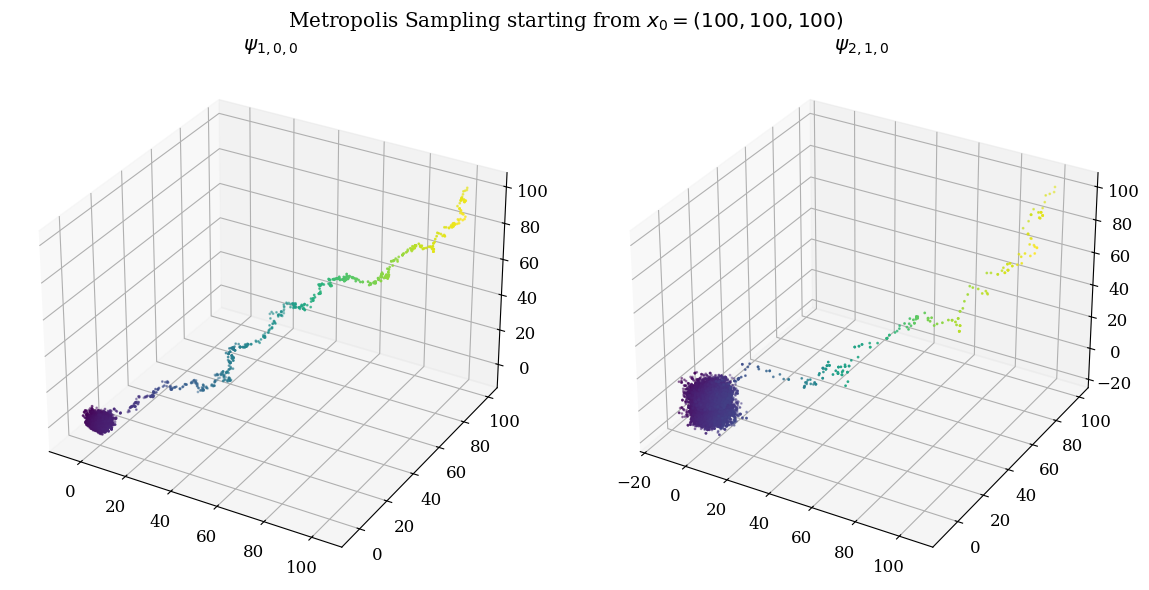

In [15]:
df_1s_far = pd.read_csv('data/1s_Gauss_far.dat', sep=' ')
df_2p_far = pd.read_csv('data/2p_Gauss_far.dat', sep=' ')

fig = plt.figure(figsize=(12, 6))
plt.suptitle(r'Metropolis Sampling starting from $x_0 = (100,100,100)$')

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df_1s_far['#x'], df_1s_far['y'], df_1s_far['z'], s=1, c=df_1s_far['#x'])
ax1.set_title(r'$\psi_{1,0,0}$')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df_2p_far['x'], df_2p_far['y'], df_2p_far['z'], s=1, c=df_2p_far['x'])
ax2.set_title(r'$\psi_{2,1,0}$')

num_points_1s = df_1s_far[(df_1s_far['#x']**2 + df_1s_far['y']**2 + df_1s_far['z']**2)**0.5 > 3].shape[0]
print(f"Number of points with distance from origin greater than 3: {num_points_1s}")
num_points_2p = df_2p_far[(df_2p_far['x']**2 + df_2p_far['y']**2 + df_2p_far['z']**2)**0.5 > 10].shape[0]
print(f"Number of points with distance from origin greater than 10: {num_points_2p}")

plt.tight_layout()

plt.show()

From these plots we can see that despite the initial distance, the sampling converges rapidly to the desired probability density. Out of $10^6$ points sampled for ground state only 6772 are at a distance greater than 2 $\langle r \rangle$, for the first excited there are 3191.

### Block size



what is the optimal block size for the estimation of the radius? To evaluate the optimal block size i used the same code as before but with only one block. In the next code cell i will evaluate the error as a function of the block size. The optimal block size is the one that minimizes the error.

In [16]:
M = 1000000
L = 10000
N = int(M / L)

@njit
def block_error(data, L):
    N = int(len(data) / L)
    block_averages = np.empty(N, dtype=np.float64)
    for i in range(N):
        block_averages[i] = np.mean(data[i * L:(i + 1) * L])
    block_mean = np.mean(block_averages)
    block_var = np.sum((block_averages - block_mean) ** 2) / (N - 1)  # Calcolo manuale della varianza
    return np.sqrt(block_var / N)

In [17]:
error_1s = pd.read_csv('data/r_1s_singleBlock.dat', sep=' ') 
error_1s_gauss = pd.read_csv('data/r_1s_Gauss_singleBlock.dat', sep=' ')
error_2p = pd.read_csv('data/r_2p_singleBlock.dat', sep=' ')
error_2p_gauss = pd.read_csv('data/r_2p_Gauss_singleBlock.dat', sep=' ')

x = np.arange(1, L)
error_1s_values = np.zeros(L-1)
error_1s_gauss_values = np.zeros(L-1)
error_2p_values = np.zeros(L-1)
error_2p_gauss_values = np.zeros(L-1)

for i in tqdm(range(1, L, 1), desc="Calculating block errors"): 
    error_1s_values[i-1] = block_error(error_1s['r_avg'].values.astype(np.float64), i)
    error_1s_gauss_values[i-1] = block_error(error_1s_gauss['r_avg'].values.astype(np.float64), i)
    error_2p_values[i-1] = block_error(error_2p['r_avg'].values.astype(np.float64), i)
    error_2p_gauss_values[i-1] = block_error(error_2p_gauss['r_avg'].values.astype(np.float64), i)

Calculating block errors: 100%|██████████| 9999/9999 [00:51<00:00, 193.93it/s]


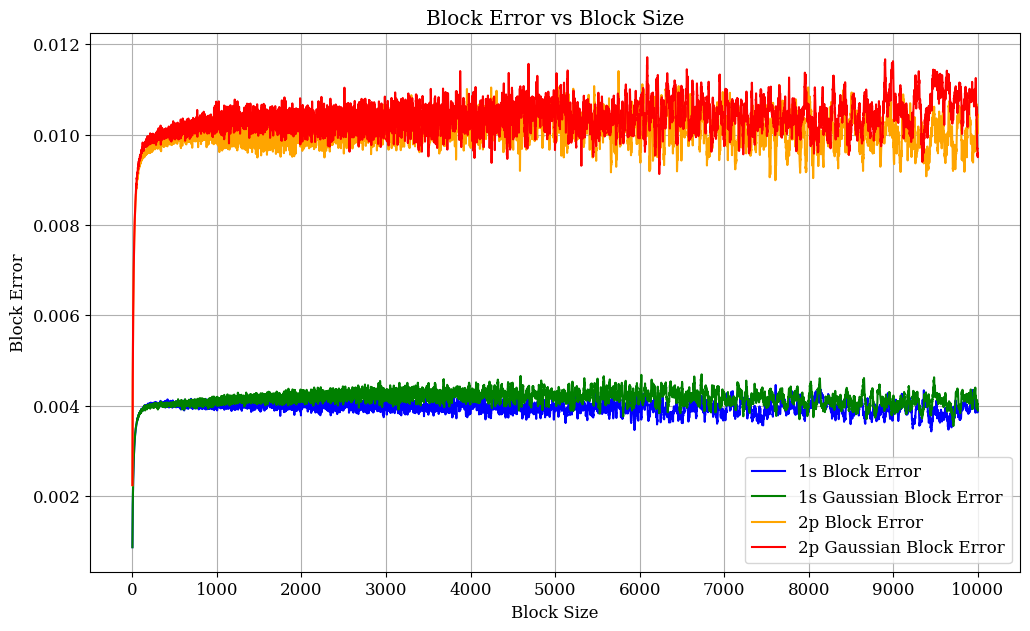

In [18]:
plt.figure(figsize=(12,7))

plt.plot(x, error_1s_values, color='blue', label='1s Block Error')
plt.plot(x, error_1s_gauss_values, color='green', label='1s Gaussian Block Error')
plt.plot(x, error_2p_values, color='orange', label='2p Block Error')
plt.plot(x, error_2p_gauss_values, color='red', label='2p Gaussian Block Error')

plt.title('Block Error vs Block Size')
plt.xlabel('Block Size')
plt.ylabel('Block Error')
plt.xticks(np.arange(0,L+1, 1000))
plt.legend()
plt.grid()
plt.show()


From the plot above we can see that the error stabilizes for block sizes greater than 1000, so using 100 blocks with a total of $10^6$ throws is a good choice.